In [28]:
#loading essential packages
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
import sys
from sklearn.model_selection import train_test_split

In [14]:
#loading dataset
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names=['id','clumps-thickness','uniform-cell-size','uniform-cell-shape','margnal-adhesion','signal-epithalial-size','bare-nuclei','bland-chromatin','normal-nucleoli','mitoses','class']
df=pd.read_csv(url,names=names)

In [19]:
#preprocess
df.replace('?',-9999,inplace=True)
df.drop(['id'],1,inplace=True)

In [17]:
print(df.axes)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clumps-thickness', 'uniform-cell-size', 'uniform-cell-shape',
       'margnal-adhesion', 'signal-epithalial-size', 'bare-nuclei',
       'bland-chromatin', 'normal-nucleoli', 'mitoses', 'class'],
      dtype='object')]


In [23]:
print(df.describe())

       clumps-thickness  uniform-cell-size  uniform-cell-shape  \
count        699.000000         699.000000          699.000000   
mean           4.417740           3.134478            3.207439   
std            2.815741           3.051459            2.971913   
min            1.000000           1.000000            1.000000   
25%            2.000000           1.000000            1.000000   
50%            4.000000           1.000000            1.000000   
75%            6.000000           5.000000            5.000000   
max           10.000000          10.000000           10.000000   

       margnal-adhesion  signal-epithalial-size  bland-chromatin  \
count        699.000000              699.000000       699.000000   
mean           2.806867                3.216023         3.437768   
std            2.855379                2.214300         2.438364   
min            1.000000                1.000000         1.000000   
25%            1.000000                2.000000         2.000000 

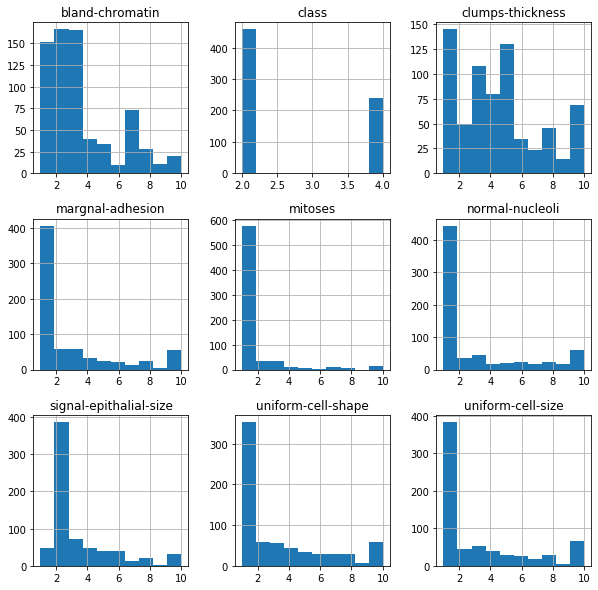

In [25]:
#creating histogram of different variables to understand them
df.hist(figsize=(10,10))
plt.show()

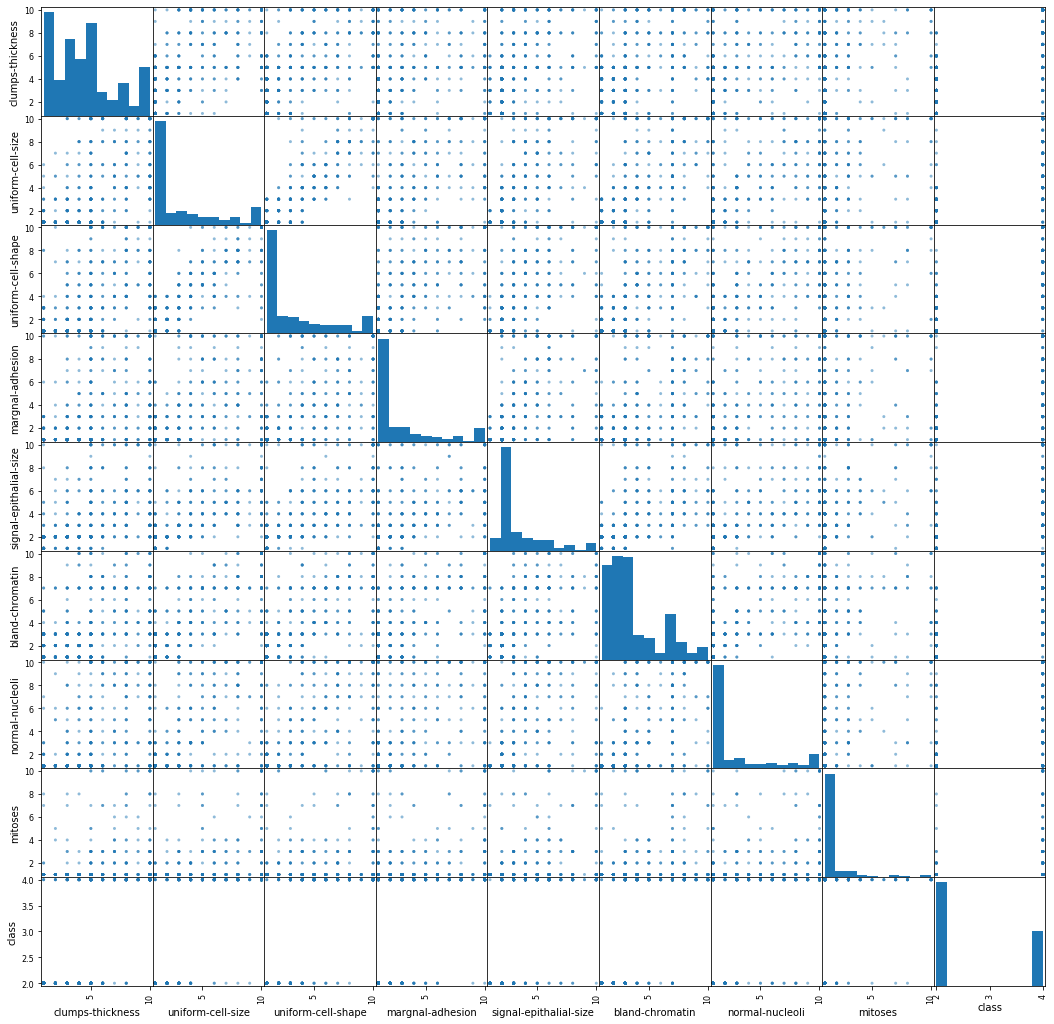

In [27]:
scatter_matrix(df,figsize=(18,18))
plt.show()

In [40]:
#creating x and y datasets
x=np.array(df.drop(['class'],1))
y=np.array(df['class'])

#spliting dataset to train and test datasets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
#specifying testing options
seed=8
scoring='accuracy'

In [42]:
#defining models
models=[]
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('SVC',SVC()))

In [43]:
#Evaluate each model in turn
results=[]
names=[]

for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

KNN: 0.964221 (0.025255)
SVC: 0.649383 (0.048607)


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [44]:
for name,model in models:
    model.fit(x_train,y_train)
    predictions=model.predict(x_test)
    print(name)
    print(accuracy_score(y_test,predictions))
    print(classification_report(y_test,predictions)) #it will tell us the false positive and negative
    
    
#precision is the measure of the false positives

KNN
0.9857142857142858
              precision    recall  f1-score   support

           2       0.99      0.99      0.99        95
           4       0.98      0.98      0.98        45

    accuracy                           0.99       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.99      0.99      0.99       140

SVC
0.6785714285714286
              precision    recall  f1-score   support

           2       0.68      1.00      0.81        95
           4       0.00      0.00      0.00        45

    accuracy                           0.68       140
   macro avg       0.34      0.50      0.40       140
weighted avg       0.46      0.68      0.55       140



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
